In [29]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [30]:
data_dict = {}

start_index = 0
end_index = 9

for i in range(start_index, end_index):  
    filename = f"gl{i*5}t_01.txt"
    data = np.loadtxt(filename, skiprows=2)  
    data_dict[filename] = data

2.822556665338642
1.768013349601573


array([2.63674352, 2.65720629, 2.61263659, 2.74746698, 2.81780757,
       2.82255667, 2.65991597, 2.333284  , 1.76801335])

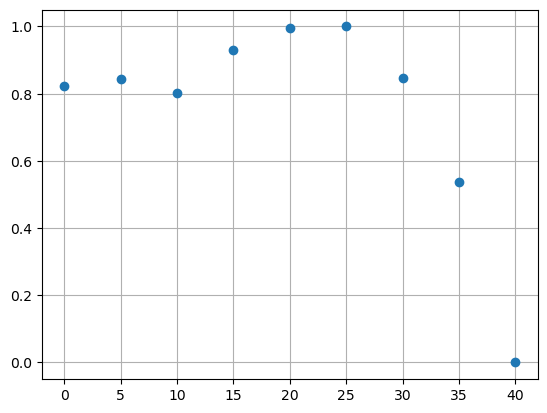

In [50]:
mean = np.zeros(9)

for i in range(start_index, end_index):
    filename = f"gl{i*5}t_01.txt"
    if filename in data_dict:
        time = data_dict[filename][:,0]
        volt = data_dict[filename][:,1]
        mv = sum(volt) / len(volt)
        mean[i] = mv

theta_1 = np.array([0,5,10,15,20,25,30,35,40])
theta_2 =np.array([180,170,160,150,140,130,120,110,100]) #90 VINKEL ER FJERNET REE
print(max(mean))
print(min(mean))
mean_norm = (mean - min(mean)) / (max(mean) - min(mean))
fig, ax = plt.subplots()
ax.grid()
ax.plot(theta_1, mean_norm, 'o')
mean

-0.8632696144517584 1.0292732295654747 1.0


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


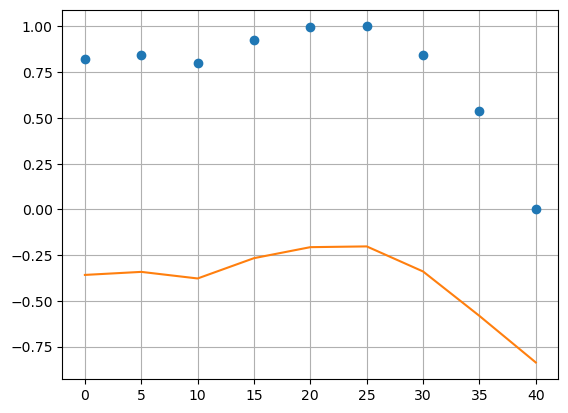

In [66]:
n_1 = 1.52 #refraction index of glass pulled straight outta google
n_2 = 1.000293 #refraction index of air pulled straight outta google

def func(x, A,B,C): #C,D,E,F,G,H
    y = A*np.sin(B*x)
    #y = 1 - ((A*n_1*np.cos(B*theta_1) - C*n_2*np.cos(D*theta_2)) / (E*n_1*np.cos(F*theta_1) + G*n_2*np.cos(H*theta_2)))**2
    return y

parameters, covariance = curve_fit(func, theta_1, mean)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
#fit_D = parameters[3]
#fit_E = parameters[4]
#fit_F = parameters[5]
#fit_G = parameters[6]
#fit_H = parameters[7]

fit_func = func(mean, fit_A,fit_B, fit_C) #,fit_C,fit_D,fit_E,fit_F,fit_G,fit_H
fig, ax = plt.subplots()
ax.grid()
ax.plot(theta_1, mean_norm, 'o')
ax.plot(theta_1, fit_func, '-', label='fit')

print(fit_A, fit_B, fit_C)